#### Corey Solitaire
##### 8/17/2020

### Seaborn Exercises

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from pydataset import data

## Exercises

#### Use the iris database to answer the following quesitons:

In [50]:
iris = sns.load_dataset('iris')

iris.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

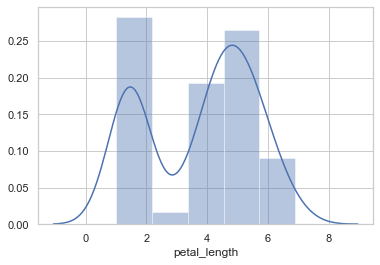

In [51]:
# 1. What does the distribution of petal lengths look like?

"""
There appears to be a bimodal distribution between petal lengths
"""

sns.distplot(iris.petal_length)
plt.show()

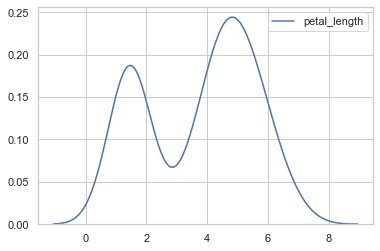

In [52]:
sns.kdeplot(iris.petal_length)
plt.show()

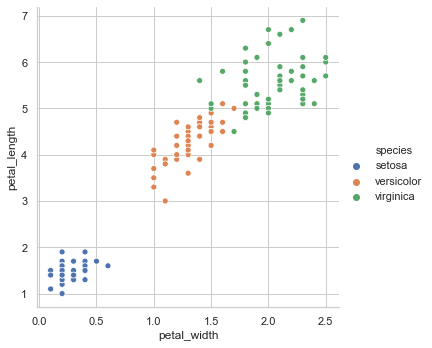

In [53]:
# 2. Is there a correlation between petal length and petal width?

"""
The Pearson r correlation value betwee petal lenght and width is 0.96, so Yes
"""

sns.relplot(x = 'petal_width', y = 'petal_length', hue = 'species', data = iris)
plt.show()

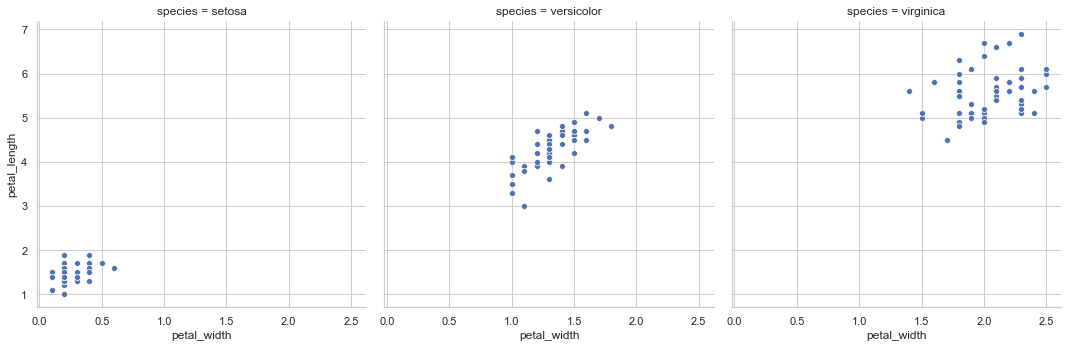

In [54]:
sns.relplot(x = 'petal_width', y = 'petal_length', col = 'species', data = iris,)
plt.show()

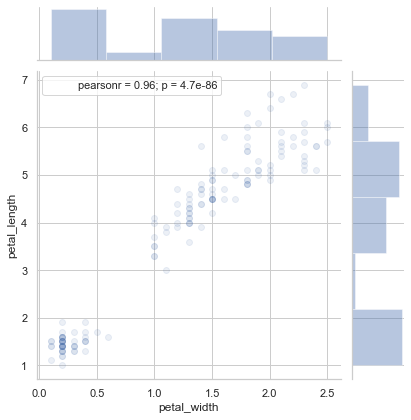

In [55]:
from scipy.stats import pearsonr
sns.jointplot(x='petal_width', y='petal_length', data=iris, alpha = 0.1, stat_func= pearsonr)
plt.show()

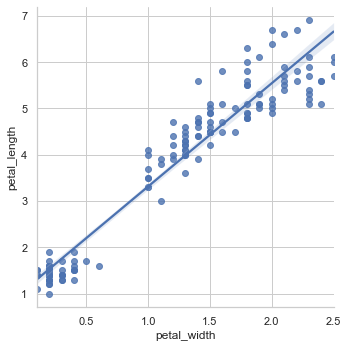

In [56]:
sns.lmplot(x='petal_width', y='petal_length', data=iris)
plt.show()

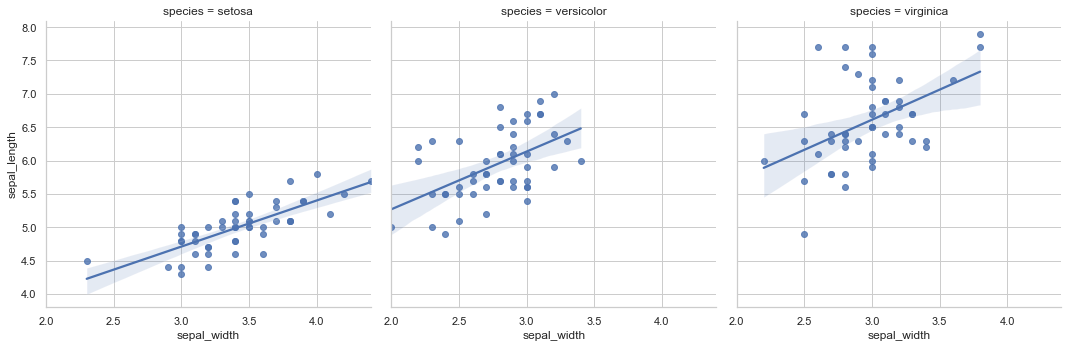

In [57]:
# 3. Would it be reasonable to predict species based on sepal width and sepal length?

"""
Predicting species based on sepal width and legntht is not ideal because there is not a high degree of
correlation between these two variables across all iris species.
"""

sns.lmplot(x='sepal_width', y='sepal_length', col ='species', data=iris)
plt.show()

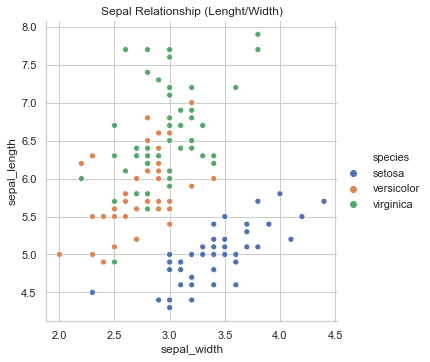

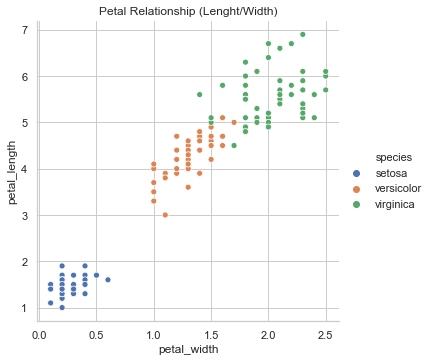

In [58]:
# 4. Which features would be best used to predict species?

"""
The best feature to use would be ratio of petal length to petal width.
"""

sns.relplot(x="sepal_width", y="sepal_length", data=iris, hue="species")
plt.title('Sepal Relationship (Lenght/Width)')

sns.relplot(x="petal_width", y="petal_length", data=iris, hue="species")
plt.title('Petal Relationship (Lenght/Width)')
plt.show()

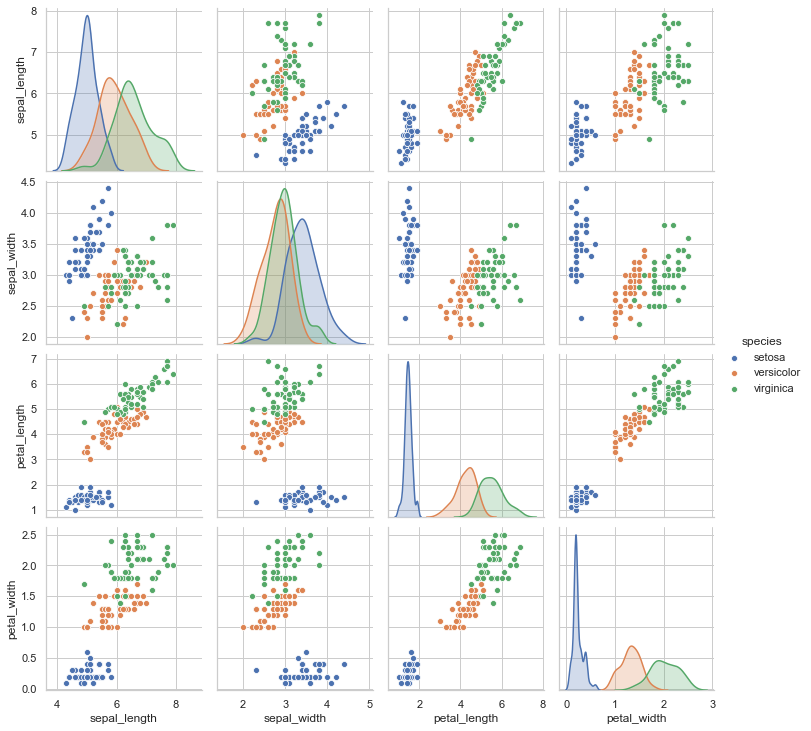

In [59]:
sns.pairplot(iris, hue = 'species')

In [60]:
# 1.Using the lesson as an example, use seaborn's load_dataset function to load the anscombe data set. 

anscombe = sns.load_dataset('anscombe')
anscombe.dtypes

dataset     object
x          float64
y          float64
dtype: object

In [61]:
anscombe.info

<bound method DataFrame.info of    dataset     x      y
0        I  10.0   8.04
1        I   8.0   6.95
2        I  13.0   7.58
3        I   9.0   8.81
4        I  11.0   8.33
5        I  14.0   9.96
6        I   6.0   7.24
7        I   4.0   4.26
8        I  12.0  10.84
9        I   7.0   4.82
10       I   5.0   5.68
11      II  10.0   9.14
12      II   8.0   8.14
13      II  13.0   8.74
14      II   9.0   8.77
15      II  11.0   9.26
16      II  14.0   8.10
17      II   6.0   6.13
18      II   4.0   3.10
19      II  12.0   9.13
20      II   7.0   7.26
21      II   5.0   4.74
22     III  10.0   7.46
23     III   8.0   6.77
24     III  13.0  12.74
25     III   9.0   7.11
26     III  11.0   7.81
27     III  14.0   8.84
28     III   6.0   6.08
29     III   4.0   5.39
30     III  12.0   8.15
31     III   7.0   6.42
32     III   5.0   5.73
33      IV   8.0   6.58
34      IV   8.0   5.76
35      IV   8.0   7.71
36      IV   8.0   8.84
37      IV   8.0   8.47
38      IV   8.0   7.04
39      

In [62]:
anscombe.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


In [63]:
#   Use pandas to group the data by the dataset column, and calculate summary statistics for each dataset. 
#   What do you notice?

"""
The mean and std for each variable (X,Y) is roughly the same.  The only difference is between min and max 
values, and even that is not highly variable.  
"""

agg_data = anscombe.groupby('dataset').agg(['max', 'min', 'mean','std'])
agg_data

x                          y                          
          max  min mean       std    max   min      mean       std
dataset                                                           
I        14.0  4.0  9.0  3.316625  10.84  4.26  7.500909  2.031568
II       14.0  4.0  9.0  3.316625   9.26  3.10  7.500909  2.031657
III      14.0  4.0  9.0  3.316625  12.74  5.39  7.500000  2.030424
IV       19.0  8.0  9.0  3.316625  12.50  5.25  7.500909  2.030579

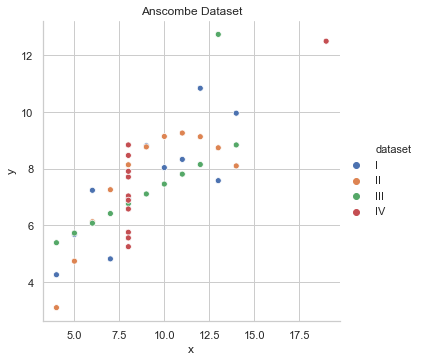

In [64]:
#   Plot the x and y values from the anscombe data. Each dataset should be in a separate column.

"""
Keyword argument col = was used in order to view data in separate columns.
"""

sns.relplot(x="x", y="y", data=anscombe, hue="dataset")
plt.title('Anscombe Dataset')
plt.show()

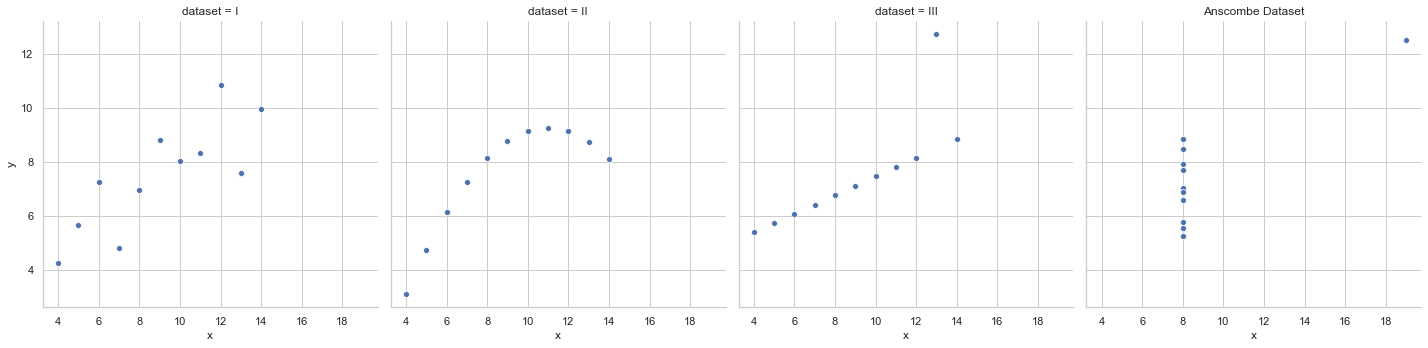

In [65]:
sns.relplot(x="x", y="y", data=anscombe, col="dataset")
plt.title('Anscombe Dataset')
plt.show()

In [66]:
# 2. Load the InsectSprays dataset and read it's documentation. 

insect_spray = data('InsectSprays')
data('InsectSprays', show_doc=True)

InsectSprays

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Effectiveness of Insect Sprays

### Description

The counts of insects in agricultural experimental units treated with
different insecticides.

### Usage

    InsectSprays

### Format

A data frame with 72 observations on 2 variables.

[,1]

count

numeric

Insect count

[,2]

spray

factor

The type of spray

### Source

Beall, G., (1942) The Transformation of data from entomological field
experiments, _Biometrika_, **29**, 243–262.

### References

McNeil, D. (1977) _Interactive Data Analysis_. New York: Wiley.

### Examples

    require(stats); require(graphics)
    boxplot(count ~ spray, data = InsectSprays,
            xlab = "Type of spray", ylab = "Insect count",
            main = "InsectSprays data", varwidth = TRUE, col = "lightgray")
    fm1 <- aov(count ~ spray, data = InsectSprays)
    summary(fm1)
    opar <- par(mfrow = c(2, 2), oma = c(0, 0, 1.1, 0))
    plot(fm1)
 

In [67]:
insect_spray.info

<bound method DataFrame.info of     count spray
1      10     A
2       7     A
3      20     A
4      14     A
5      14     A
6      12     A
7      10     A
8      23     A
9      17     A
10     20     A
11     14     A
12     13     A
13     11     B
14     17     B
15     21     B
16     11     B
17     16     B
18     14     B
19     17     B
20     17     B
21     19     B
22     21     B
23      7     B
24     13     B
25      0     C
26      1     C
27      7     C
28      2     C
29      3     C
30      1     C
31      2     C
32      1     C
33      3     C
34      0     C
35      1     C
36      4     C
37      3     D
38      5     D
39     12     D
40      6     D
41      4     D
42      3     D
43      5     D
44      5     D
45      5     D
46      5     D
47      2     D
48      4     D
49      3     E
50      5     E
51      3     E
52      5     E
53      3     E
54      6     E
55      1     E
56      1     E
57      3     E
58      2     E
59      6     E
60      

In [68]:
insect_spray.head()

,count,spray
1,10,A
2,7,A
3,20,A
4,14,A
5,14,A


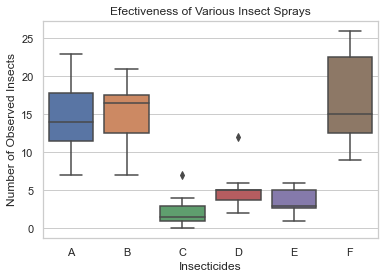

In [69]:
#  - Create a boxplot that shows the effectiveness of the different insect sprays.

sns.boxplot(data =insect_spray, y='count', x='spray')
plt.title('Efectiveness of Various Insect Sprays')
plt.xlabel ('Insecticides')
plt.ylabel ('Number of Observed Insects')
plt.show()

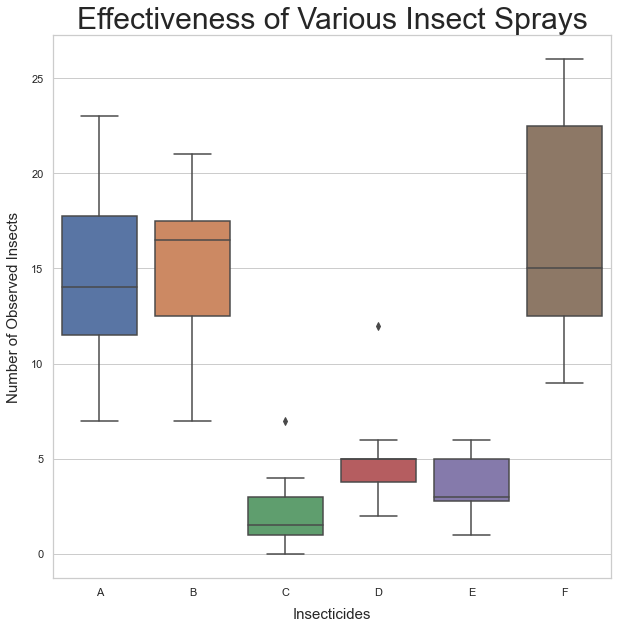

In [98]:
fig_dims = (10, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(data =insect_spray, y='count', x='spray', ax=ax)
plt.title('Effectiveness of Various Insect Sprays',fontsize= 30)
plt.xlabel ('Insecticides',fontsize= 15, labelpad = 10)
plt.ylabel ('Number of Observed Insects',fontsize= 15,labelpad = 10)
plt.show()

In [71]:
# 3. Load the swiss dataset and read it's documentation. Create visualizations to answer the following questions:

swiss = data('swiss')
data('swiss', show_doc=True)

swiss

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Swiss Fertility and Socioeconomic Indicators (1888) Data

### Description

Standardized fertility measure and socio-economic indicators for each of 47
French-speaking provinces of Switzerland at about 1888.

### Usage

    data(swiss)

### Format

A data frame with 47 observations on 6 variables, each of which is in percent,
i.e., in [0,100].

[,1] Fertility Ig, "common standardized fertility measure" [,2] Agriculture
[,3] Examination nation [,4] Education [,5] Catholic [,6] Infant.Mortality
live births who live less than 1 year.

All variables but 'Fert' give proportions of the population.

### Source

Project "16P5", pages 549-551 in

Mosteller, F. and Tukey, J. W. (1977) “Data Analysis and Regression: A Second
Course in Statistics”. Addison-Wesley, Reading Mass.

indicating their source as "Data used by permission of Franice van de Walle.
Office of Population Research, Princeton Univer

In [72]:
swiss.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47 entries, Courtelary to Rive Gauche
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Fertility         47 non-null     float64
 1   Agriculture       47 non-null     float64
 2   Examination       47 non-null     int64  
 3   Education         47 non-null     int64  
 4   Catholic          47 non-null     float64
 5   Infant.Mortality  47 non-null     float64
dtypes: float64(4), int64(2)
memory usage: 2.6+ KB


In [73]:
swiss.head()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
Courtelary,80.2,17.0,15,12,9.96,22.2
Delemont,83.1,45.1,6,9,84.84,22.2
Franches-Mnt,92.5,39.7,5,5,93.40,20.2
Moutier,85.8,36.5,12,7,33.77,20.3
Neuveville,76.9,43.5,17,15,5.16,20.6


In [74]:
#  3a. Create an attribute named is_catholic that holds a boolean value of whether or not the province is 
#      Catholic. (Choose a cutoff point for what constitutes catholic)

"""
To determine catholic cutoff point, I took the mean of the Catholic privince data.  Equal to or greater
is catholic, less than is non catholic
"""

'\nTo determine catholic cutoff point, I took the mean of the Catholic privince data.  Equal to or greater\nis catholic, less than is non catholic\n'

In [75]:
#Boolean Sort for is Catholic
swiss_catholic = swiss.Catholic >= 41
swiss_catholic.head()

Courtelary      False
Delemont         True
Franches-Mnt     True
Moutier         False
Neuveville      False
Name: Catholic, dtype: bool

In [76]:
#Boolean Sort for not Catholic
not_swiss_catholic = swiss.Catholic <41
not_swiss_catholic.head()

Courtelary       True
Delemont        False
Franches-Mnt    False
Moutier          True
Neuveville       True
Name: Catholic, dtype: bool

In [77]:
#Visulaize data to make sure my new row is visible
swiss['is_catholic'] = swiss_catholic
swiss.head()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality,is_catholic
Courtelary,80.2,17.0,15,12,9.96,22.2,False
Delemont,83.1,45.1,6,9,84.84,22.2,True
Franches-Mnt,92.5,39.7,5,5,93.40,20.2,True
Moutier,85.8,36.5,12,7,33.77,20.3,False
Neuveville,76.9,43.5,17,15,5.16,20.6,False


In [78]:
#  3b. Does whether or not a province is Catholic influence fertility?

"""
In order to answer this question i broke my Datafame in to two subsets, catholic and non-catholic
and used .describe() to view correlations.  I then graphed each dataset and campaired results
"""

catholic = swiss[swiss_catholic].sort_values(by =['is_catholic', 'Fertility'], ascending = False)
catholic

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality,is_catholic
Franches-Mnt,92.5,39.7,5,5,93.40,20.2,True
Glane,92.4,67.8,14,8,97.16,24.9,True
Sierre,92.2,84.6,3,3,99.46,16.3,True
Veveyse,87.1,64.5,14,6,98.61,24.5,True
Broye,83.8,70.2,16,7,92.85,23.6,True
Delemont,83.1,45.1,6,9,84.84,22.2,True
Sarine,82.9,45.2,16,13,91.38,24.4,True
Gruyere,82.4,53.3,12,7,97.67,21.0,True
Monthey,79.4,64.9,7,3,98.22,20.2,True
Sion,79.3,63.1,13,13,96.83,18.1,True


In [79]:
non_catholic = swiss[not_swiss_catholic].sort_values(by =['is_catholic', 'Fertility'], ascending = False)
non_catholic

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality,is_catholic
Moutier,85.8,36.5,12,7,33.77,20.3,False
Courtelary,80.2,17.0,15,12,9.96,22.2,False
Val de Ruz,77.6,37.6,15,7,4.97,20.0,False
Neuveville,76.9,43.5,17,15,5.16,20.6,False
Payerne,74.2,58.1,14,8,5.23,23.8,False
Le Locle,72.7,16.7,22,13,11.22,18.9,False
Oron,72.5,71.2,12,1,2.40,21.0,False
Paysd'enhaut,72.0,63.5,6,3,2.56,18.0,False
Grandson,71.7,34.0,17,8,3.30,20.0,False
Boudry,70.4,38.4,26,12,5.62,20.3,False


In [80]:
catholic.describe()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
count,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000
mean,74.278947,59.147368,11.894737,11.421053,88.921053,20.415789
std,16.756212,23.280258,7.978407,12.654888,17.802864,3.161797
min,35.000000,1.200000,3.000000,2.000000,42.340000,15.100000
25%,69.900000,45.150000,6.500000,5.500000,90.975000,18.150000
50%,79.300000,64.500000,12.000000,7.000000,97.160000,19.800000
75%,83.450000,77.050000,15.000000,11.000000,99.010000,22.900000
max,92.500000,89.700000,37.000000,53.000000,100.000000,26.600000


In [81]:
non_catholic.describe()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
count,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000
mean,67.335714,44.900000,19.607143,10.678571,8.723571,19.621429
std,7.645876,20.793215,6.407977,7.107917,7.458397,2.743120
min,54.300000,7.700000,6.000000,1.000000,2.150000,10.800000
25%,63.500000,24.950000,15.000000,7.000000,3.975000,18.525000
50%,66.300000,50.200000,19.000000,9.500000,5.425000,20.100000
75%,72.125000,61.100000,22.750000,12.000000,11.442500,21.050000
max,85.800000,73.000000,35.000000,32.000000,33.770000,23.800000


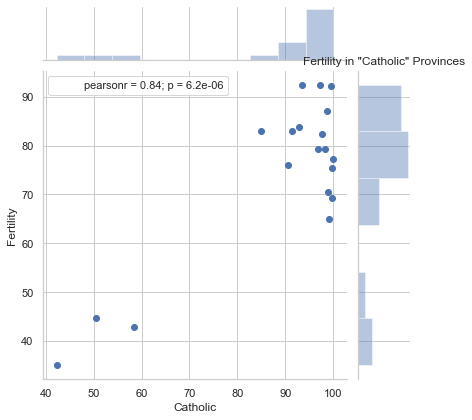

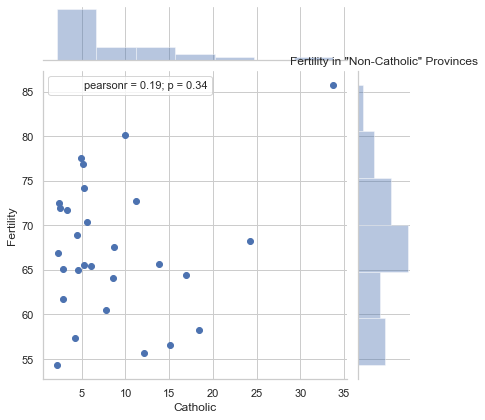

In [82]:
# Want to make two graphs to compaire vairables before moving on to 3

sns.jointplot(x="Catholic", y="Fertility", data=catholic, stat_func= pearsonr)
plt.title('Fertility in "Catholic" Provinces')
plt.show()

sns.jointplot(x="Catholic", y="Fertility", data= non_catholic, stat_func= pearsonr)
plt.title('Fertility in "Non-Catholic" Provinces')
plt.show()

In [83]:
"""
The Pearson r value suggests a higher degree of correlation with fertility and 'catholic' 
"""

"\nThe Pearson r value suggests a higher degree of correlation with fertility and 'catholic' \n"

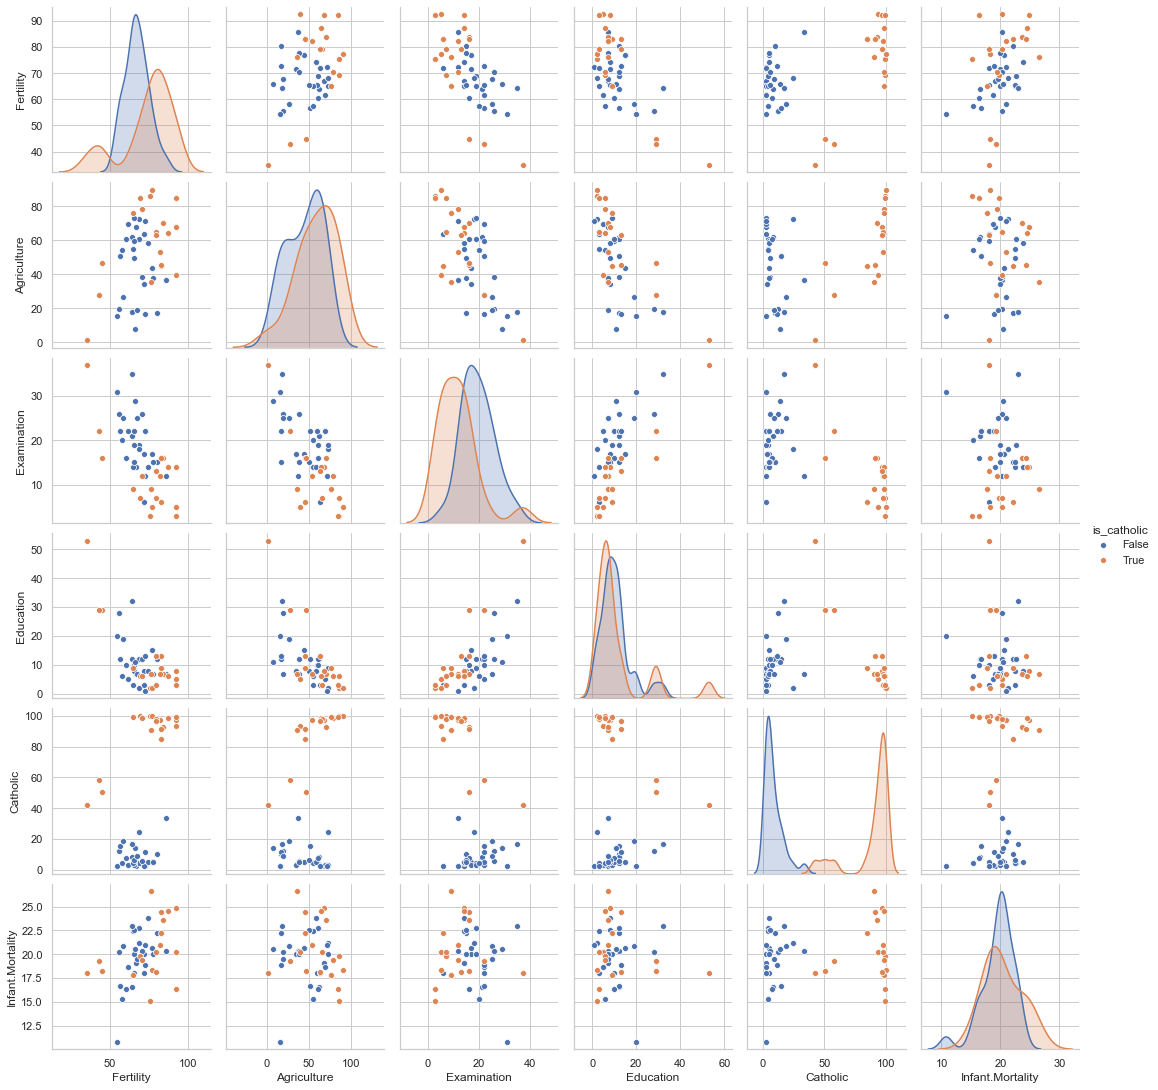

In [84]:
#  3c. What measure correlates most strongly with fertility?

"""
Fertility and Infant Mortality have the strongest correlation, Fertility and Agriculture have the 
second highest correlation.
"""

sns.pairplot(swiss, hue = 'is_catholic')

In [85]:
# 4. Using the chipotle dataset from the previous exercise, 

from env import host, user, password

def get_db_url(database, user=user, host=host, password=password): 
    url = f'mysql+pymysql://{user}:{password}@{host}/{database}'
    return url

url = get_db_url('chipotle')

chipotle = pd.read_sql('SELECT * FROM orders', url)

chipotle


,id,order_id,quantity,item_name,choice_description,item_price
0,1,1,1,Chips and Fresh Tomato Salsa,nan,$2.39
1,2,1,1,Izze,[Clementine],$3.39
2,3,1,1,Nantucket Nectar,[Apple],$3.39
3,4,1,1,Chips and Tomatillo-Green Chili Salsa,nan,$2.39
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",$16.98
...,...,...,...,...,...,...
4617,4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour Cream, Cheese, Lettuce, Guacamole]]",$11.75
4618,4619,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese, Lettuce, Guacamole]]",$11.75
4619,4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto Beans, Guacamole, Lettuce]]",$11.25
4620,4621,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettuce]]",$8.75


In [86]:
#   create a bar chart that shows the 4 most popular items and the revenue produced by each.

chipotle_item_counts = chipotle.groupby('item_name').quantity.agg(['sum'])
big_4_items = chipotle_item_counts.nlargest(4, 'sum', keep='all')
big_4_items

,sum
item_name,
Chicken Bowl,761
Chicken Burrito,591
Chips and Guacamole,506
Steak Burrito,386


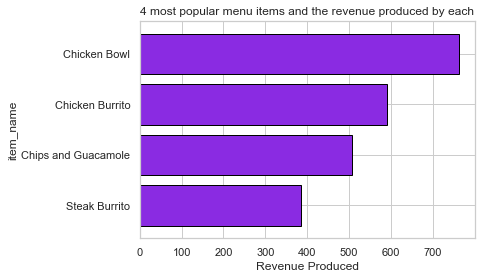

In [87]:

big_4_items.plot.barh(color='blueviolet', 
                               ec='black', 
                               width=.8,)

plt.title('4 most popular menu items and the revenue produced by each')
plt.xlabel('Revenue Produced')

# reorder y-axis of horizontal bar chart
plt.gca().invert_yaxis()
# removes the legend once it is made
plt.gca().get_legend().remove()
plt.show()



In [88]:
# 5. Load the sleepstudy data and read it's documentation. 

sleep_study = data('sleepstudy')
data('sleepstudy', show_doc=True)

sleepstudy

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Reaction times in a sleep deprivation study

### Description

The average reaction time per day for subjects in a sleep deprivation study.
On day 0 the subjects had their normal amount of sleep. Starting that night
they were restricted to 3 hours of sleep per night. The observations represent
the average reaction time on a series of tests given each day to each subject.

### Format

A data frame with 180 observations on the following 3 variables.

`Reaction`

Average reaction time (ms)

`Days`

Number of days of sleep deprivation

`Subject`

Subject number on which the observation was made.

### Details

These data are from the study described in Belenky et al. (2003), for the
sleep-deprived group and for the first 10 days of the study, up to the
recovery period.

### References

Gregory Belenky, Nancy J. Wesensten, David R. Thorne, Maria L. Thomas, Helen
C. Sing, Daniel P. Redmond, 

In [89]:
sleep_study.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 1 to 180
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Reaction  180 non-null    float64
 1   Days      180 non-null    int64  
 2   Subject   180 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 5.6 KB


In [90]:
sleep_study.head()

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308


In [91]:
#   Use seaborn to create a line chart of all the individual subject's reaction times and a more 
#   prominant line showing the average change in reaction time.

"""
Need to group and describe data to get a min-max to calculate change over time
Final Reaction - Inital Reaction / Final Day - Initial Day

"""

average_change_df = sleep_study.groupby('Subject').describe()
average_change_df



Reaction                                                         \
           count       mean        std       min         25%        50%   
Subject                                                                   
308         10.0  342.13383  79.821763  249.5600  266.565675  339.14585   
309         10.0  215.23298  10.812193  202.9778  205.878375  214.79605   
310         10.0  231.00127  21.855996  194.3322  222.670275  233.58080   
330         10.0  303.22142  22.909199  280.2396  285.299075  298.99285   
331         10.0  309.43605  27.242607  285.0000  290.885925  297.78375   
332         10.0  307.30207  64.306126  234.8606  258.638625  309.88320   
333         10.0  316.15831  30.068208  276.7693  291.459000  315.91810   
334         10.0  295.30205  41.855607  243.3647  268.155125  281.60780   
335         10.0  250.07004  13.833852  235.3110  238.337025  248.45210   
337         10.0  375.72101  59.623789  291.6112  321.884900  378.78545   
349         10.0  275.83447  42.937942  230.3167  241.871775  262.34820   
350         10.0  313.60268  63.360558  243.4543  256.227650  299.32060   
351         10.0  290.09775  28.978811  250.5265  270.377275  284.16785   
352         10.0  337.42154  47.602380  221.6771  331.872750  350.78445   
369         10.0  306.03464  37.460429  257.2424  273.356775  306.47875   
370         10.0  291.70177  59.208212  225.2640  239.293850  274.34270   
371         10.0  294.98404  36.505989  259.2658  273.806825  280.48000   
372         10.0  317.88613  35.822804  269.4117  289.778650  320.11960   

                               Days                                           
                75%       max count mean      std  min   25%  50%   75%  max  
Subject                                                                       
308      406.568525  466.3535  10.0  4.5  3.02765  0.0  2.25  4.5  6.75  9.0  
309      221.482225  237.3142  10.0  4.5  3.02765  0.0  2.25  4.5  6.75  9.0  
310      244.491675  261.0125  10.0  4.5  3.02765  0.0  2.25  4.5  6.75  9.0  
330      315.033350  354.0487  10.0  4.5  3.02765  0.0  2.25  4.5  6.75  9.0  
331      319.155800  371.5811  10.0  4.5  3.02765  0.0  2.25  4.5  6.75  9.0  
332      327.090950  454.1619  10.0  4.5  3.02765  0.0  2.25  4.5  6.75  9.0  
333      336.964875  362.0428  10.0  4.5  3.02765  0.0  2.25  4.5  6.75  9.0  
334      325.023375  377.2990  10.0  4.5  3.02765  0.0  2.25  4.5  6.75  9.0  
335      254.599825  273.9472  10.0  4.5  3.02765  0.0  2.25  4.5  6.75  9.0  
337      413.584250  458.9167  10.0  4.5  3.02765  0.0  2.25  4.5  6.75  9.0  
349      301.467700  351.6451  10.0  4.5  3.02765  0.0  2.25  4.5  6.75  9.0  
350      375.312975  394.4872  10.0  4.5  3.02765  0.0  2.25  4.5  6.75  9.0  
351      303.489600  347.5655  10.0  4.5  3.02765  0.0  2.25  4.5  6.75  9.0  
352      358.931100  388.5417  10.0  4.5  3.02765  0.0  2.25  4.5  6.75  9.0  
369      334.513375  366.5131  10.0  4.5  3.02765  0.0  2.25  4.5  6.75  9.0  
370      346.737550  372.2288  10.0  4.5  3.02765  0.0  2.25  4.5  6.75  9.0  
371      299.600950  369.4692  10.0  4.5  3.02765  0.0  2.25  4.5  6.75  9.0  
372      341.035375  369.1417  10.0  4.5  3.02765  0.0  2.25  4.5  6.75  9.0

In [92]:
"""
To calculate average change in reaction time I need to know average reaction time per day for all 
subjects
"""

sleep_study.groupby('Subject').Reaction.agg('mean')

Subject
308    342.13383
309    215.23298
310    231.00127
330    303.22142
331    309.43605
332    307.30207
333    316.15831
334    295.30205
335    250.07004
337    375.72101
349    275.83447
350    313.60268
351    290.09775
352    337.42154
369    306.03464
370    291.70177
371    294.98404
372    317.88613
Name: Reaction, dtype: float64

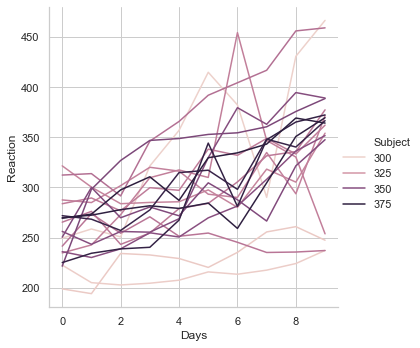

In [93]:
#Don't like this
sns.relplot(x = 'Days', y = 'Reaction', kind = "line", hue= 'Subject', data = sleep_study)
plt.show()

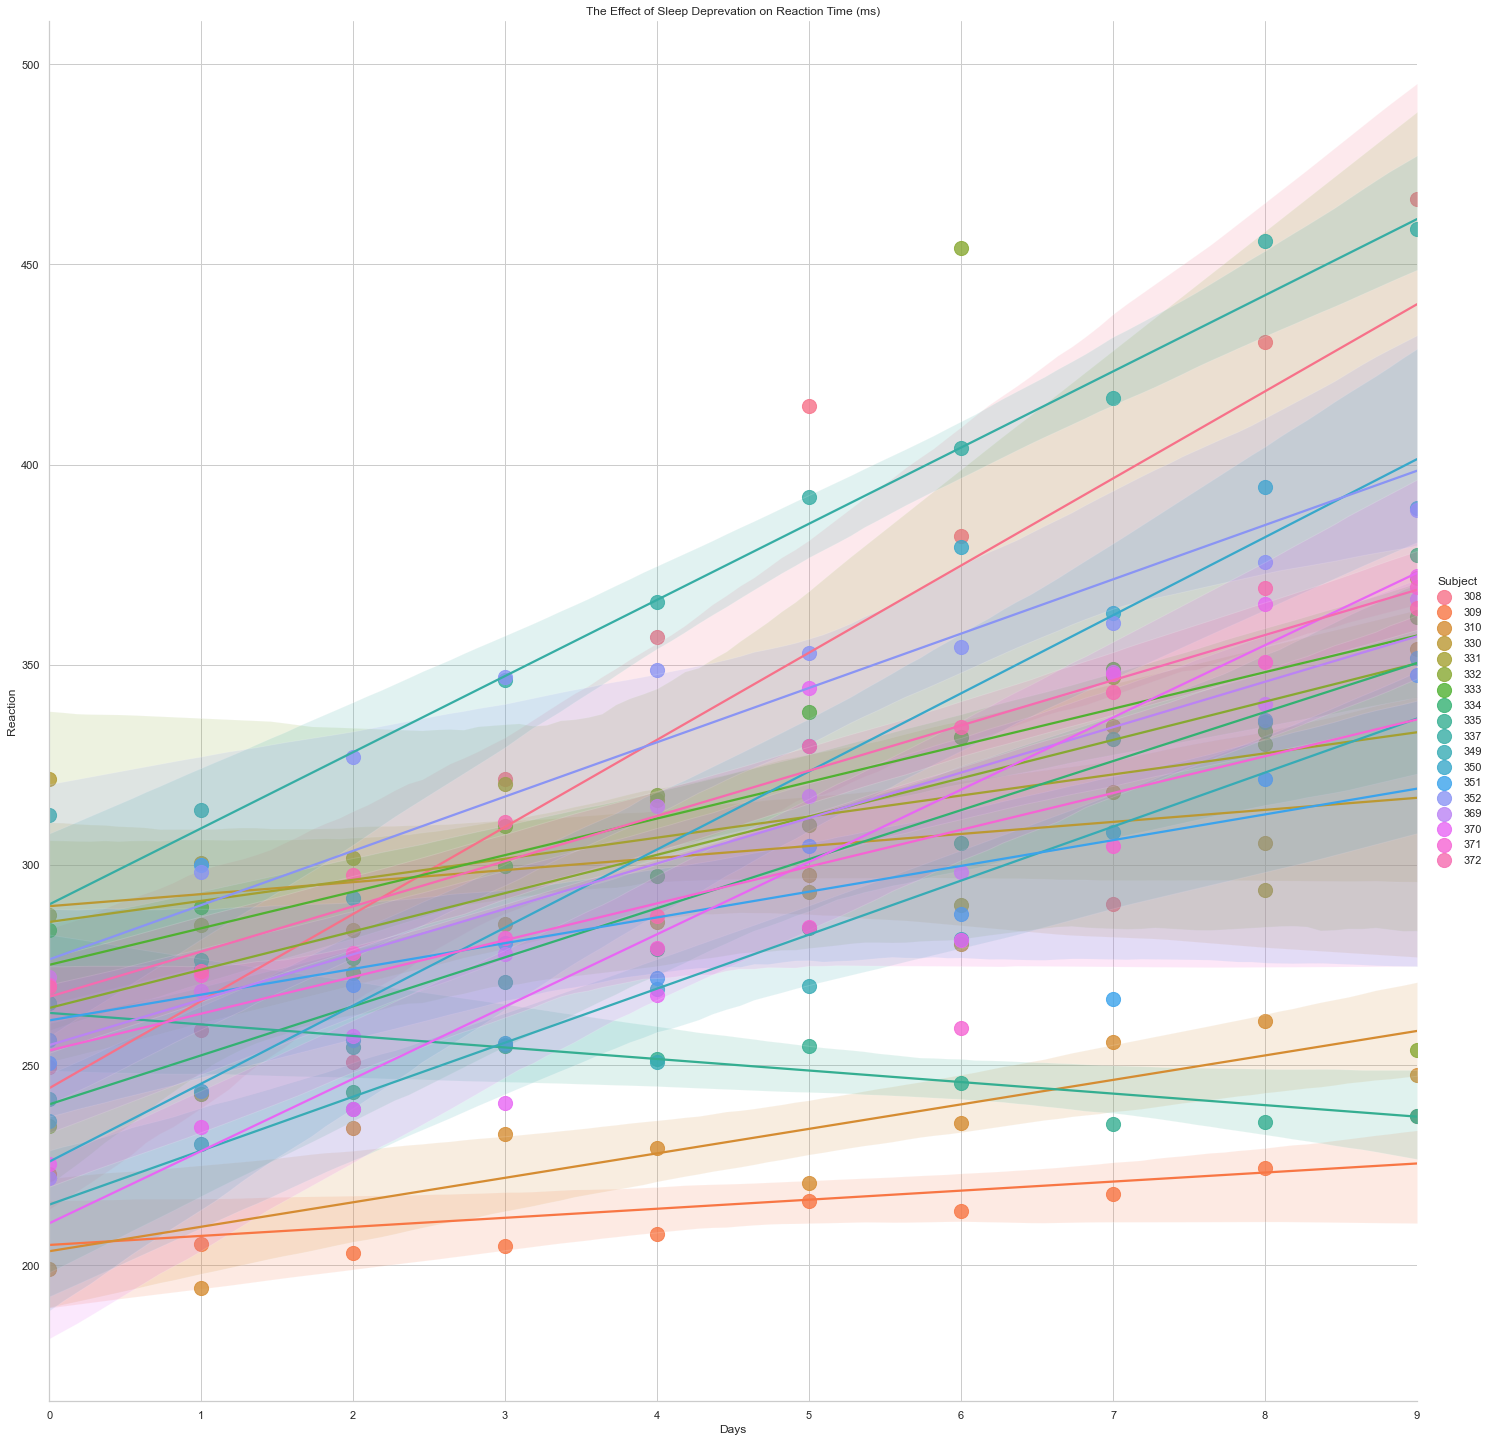

In [94]:

sns.lmplot(data=sleep_study, x='Days', y='Reaction', \
               fit_reg=True, hue='Subject', \
               height=20, scatter_kws={'s':200}, truncate = True)
plt.title('The Effect of Sleep Deprevation on Reaction Time (ms)')
plt.show()


In [95]:
"""
New approach after peer consultation
"""

'\nNew approach after peer consultation\n'

In [96]:
# create data frame with data grouped by days that shows the average reaction time per day
avg_sleep = pd.DataFrame(sleep_study.groupby('Days').Reaction.agg('mean'))
avg_sleep

,Reaction
Days,
0,256.651806
1,264.495756
2,265.361900
3,282.992011
4,288.649422
5,308.518456
6,312.178256
7,318.750583
8,336.629506


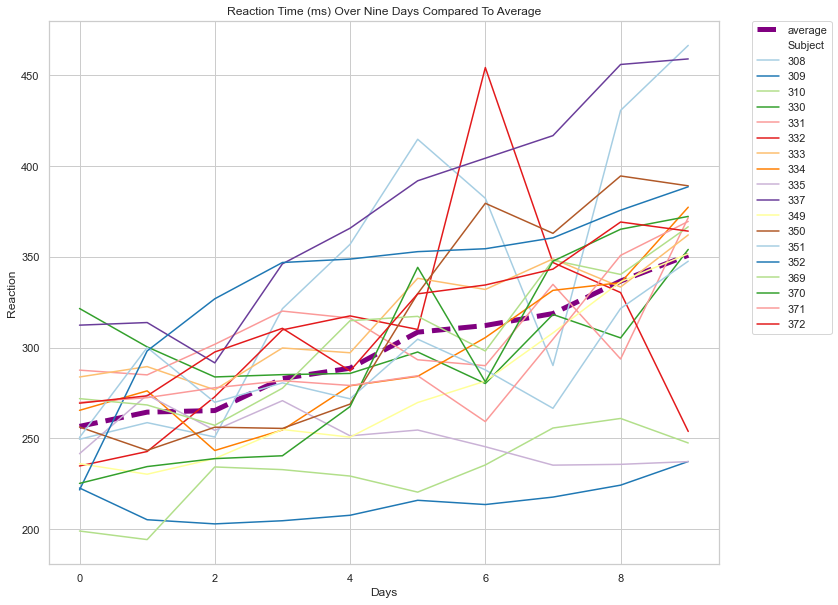

In [97]:
# set figure size
plt.figure(figsize=(12, 10))
# plot average for each day as line, set linewidth to 7 so it stands out, add label for legend, change color to purple
plt.plot(avg_sleep.index, avg_sleep.Reaction, linewidth = 5, linestyle = '--', label = 'average', c = 'purple')
# add average line to legend
plt.legend('average')
# plot each patients reaction times, color by subject number, use palette that gives each patient a unique color
sns.lineplot('Days', 'Reaction', hue = 'Subject', data = sleep_study, palette = 'Paired')
# change position of legend to avoid covering data points
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.title('Reaction Time (ms) Over Nine Days Compared To Average')
plt.show()